In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

# Developing a function for descriptive statistics for a given field
def desc_stat(ds, var):


    mean = ds[var].mean()
    median = ds[var].median()
    mode = ds[var].mode()[0]
    minimum = ds[var].min()
    maximum = ds[var].max()
    data_range = maximum - minimum
    std_dev = ds[var].std()
    variance = ds[var].var()
    skew = ds[var].skew()
    kurtosis = ds[var].kurt()
    Quart = [
        ds[var].quantile(0),
        ds[var].quantile(0.25),
        ds[var].quantile(0.50),
        ds[var].quantile(0.75),
        ds[var].quantile(1),
        ds[var].quantile(0.75) - ds[var].quantile(0.25)
    ]
    count = ds[var].count()

    summary = {
        "Mean": mean,
        "Median": median,
        "Mode": mode,
        "Minimum": minimum,
        "Maximum": maximum,
        "Range": data_range,
        "Std Dev": std_dev,
        "Variance": variance,
        "Skewness": skew,
        "Kurtosis": kurtosis,
        "25th Percentile (Q1)": Quart[1],
        "50th Percentile (Median/Q2)": Quart[2],
        "75th Percentile (Q3)": Quart[3],
        "Inter Quartile Range (IQR)": Quart[5],
        "Count": count
    }

    # Printing the report in an organized way
    print(f"Detailed Descriptive Statistics Report for '{var}':\n")

    categories = {
        "Measures of Tendency": ["Mean", "Median", "Mode"],
        "Measures of Dispersion": ["Range", "Std Dev", "Variance", "Inter Quartile Range (IQR)"],
        "Measures of Position": ["25th Percentile (Q1)", "50th Percentile (Median/Q2)", "75th Percentile (Q3)", "Minimum", "Maximum", "Skewness", "Kurtosis"],
        "Measures of Frequency": ["Count"]
    }

    for category, measures in categories.items():
        print(category + ":")
        for measure in measures:
            print(f"{measure:<30}: {summary[measure]}")
        print()



In [ ]:
#Random Sampling (size = 150)
random_sample = df.sample(n=150, replace=False, random_state=42)

#Applying the descriptive function to the dependent variable 'Exam_Score'
print("\n--> Using Random Sampling")
desc_stat(random_sample, 'Exam_Score')



--> Using Random Sampling
Detailed Descriptive Statistics Report for 'Exam_Score':

Measures of Tendency:
Mean                          : 67.40666666666667
Median                        : 67.0
Mode                          : 67

Measures of Dispersion:
Range                         : 34
Std Dev                       : 4.122449045137356
Variance                      : 16.9945861297539
Inter Quartile Range (IQR)    : 5.0

Measures of Position:
25th Percentile (Q1)          : 65.0
50th Percentile (Median/Q2)   : 67.0
75th Percentile (Q3)          : 70.0
Minimum                       : 55
Maximum                       : 89
Skewness                      : 0.8060112025058073
Kurtosis                      : 4.160412079732445

Measures of Frequency:
Count                         : 150



In [ ]:
# Systematic Sampling
systematic_sample = df.iloc[::30]

# Applying the descriptive function we created
print('\n--> Using Systematic Sampling')
desc_stat(systematic_sample, 'Exam_Score')



--> Using Systematic Sampling
Detailed Descriptive Statistics Report for 'Exam_Score':

Measures of Tendency:
Mean                          : 66.68778280542986
Median                        : 66.0
Mode                          : 66

Measures of Dispersion:
Range                         : 18
Std Dev                       : 3.3584743651996214
Variance                      : 11.279350061703
Inter Quartile Range (IQR)    : 5.0

Measures of Position:
25th Percentile (Q1)          : 64.0
50th Percentile (Median/Q2)   : 66.0
75th Percentile (Q3)          : 69.0
Minimum                       : 57
Maximum                       : 75
Skewness                      : -0.05303793789326664
Kurtosis                      : -0.28947340086944795

Measures of Frequency:
Count                         : 221



In [ ]:
# Detailed Descriptive Statistics Report About the Dependent Variable 'Exam_Score'

print('\n--> Using the Whole Dataset')
desc_stat(df, 'Exam_Score')



--> Using the Whole Dataset
Detailed Descriptive Statistics Report for 'Exam_Score':

Measures of Tendency:
Mean                          : 67.23565914938702
Median                        : 67.0
Mode                          : 68

Measures of Dispersion:
Range                         : 46
Std Dev                       : 3.890455781261724
Variance                      : 15.135646185952773
Inter Quartile Range (IQR)    : 4.0

Measures of Position:
25th Percentile (Q1)          : 65.0
50th Percentile (Median/Q2)   : 67.0
75th Percentile (Q3)          : 69.0
Minimum                       : 55
Maximum                       : 101
Skewness                      : 1.6448082853982677
Kurtosis                      : 10.575422734795485

Measures of Frequency:
Count                         : 6607



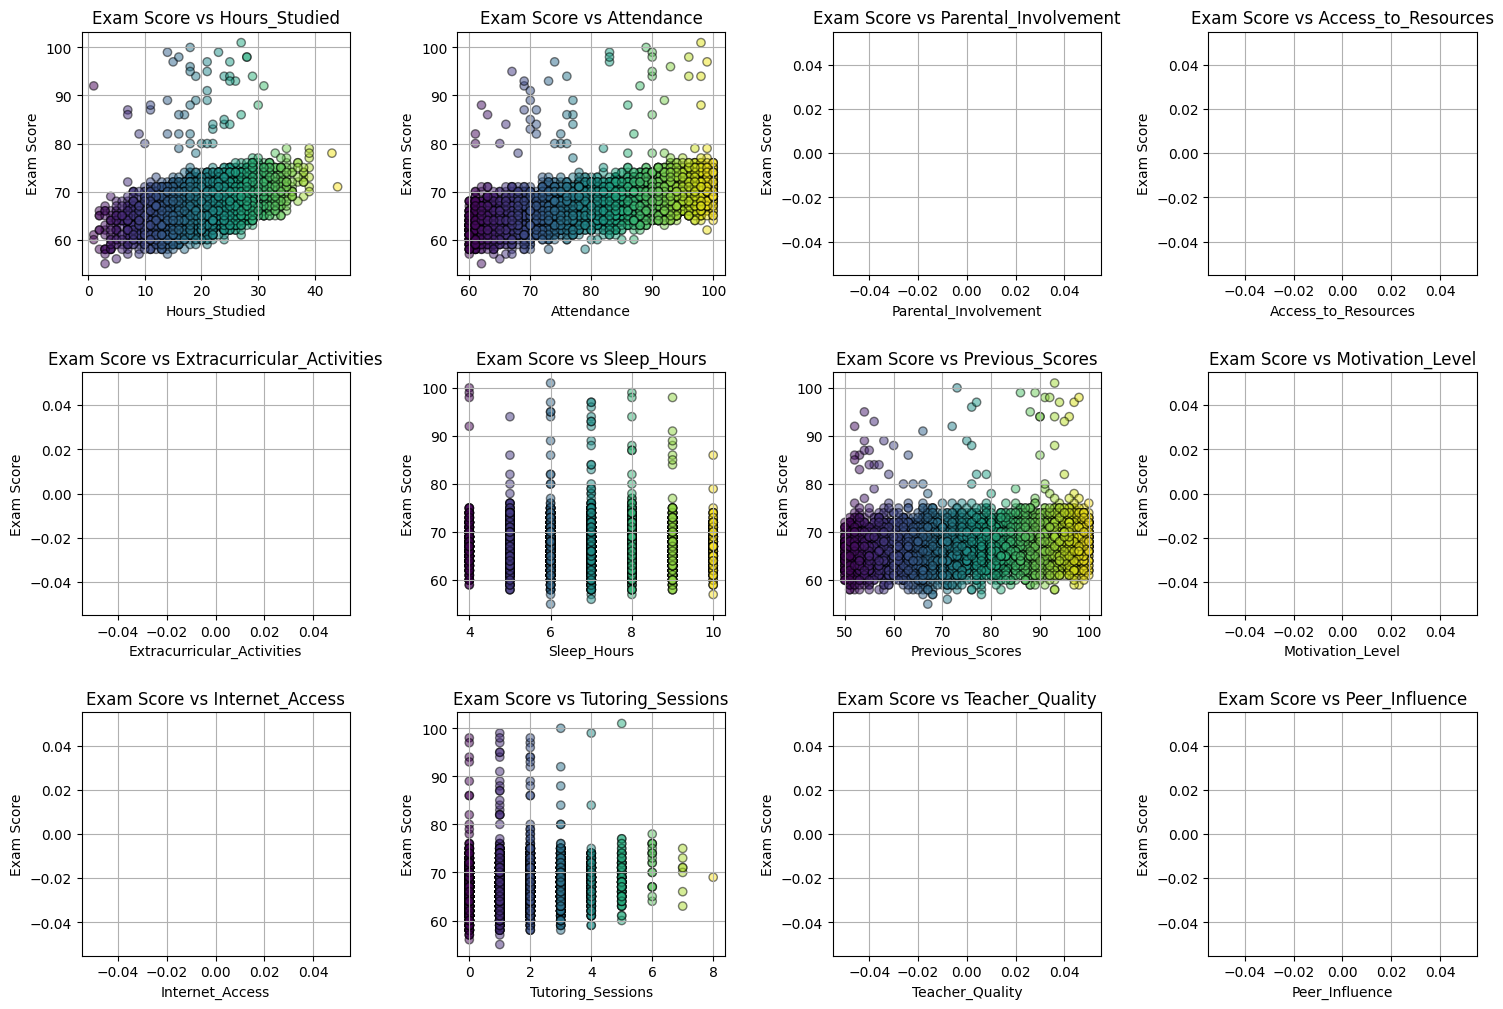

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df is already loaded
# Convert 'Exam_Score' and independent variables to numeric (coerce errors to NaN)
numeric_columns = ['Hours_Studied', 'Attendance', 'Parental_Involvement',
                   'Access_to_Resources', 'Extracurricular_Activities',
                   'Sleep_Hours', 'Previous_Scores', 'Motivation_Level',
                   'Internet_Access', 'Tutoring_Sessions', 'Teacher_Quality',
                   'Peer_Influence', 'Exam_Score']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values only for numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Scatter plot settings
num_cols = 4  # Number of columns in subplot
num_vars = len(numeric_columns) - 1  # Exclude 'Exam_Score'
num_rows = (num_vars + num_cols - 1) // num_cols  # Ensures enough rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
axes = axes.flatten()

# Scatter plots for each independent variable vs 'Exam_Score'
for idx, column in enumerate(numeric_columns[:-1]):  # Exclude 'Exam_Score' itself
    scatter = axes[idx].scatter(df[column], df['Exam_Score'], alpha=0.5,
                                c=df[column], cmap='viridis', edgecolors='k')
    axes[idx].set_xlabel(column)  # Independent variable on X-axis
    axes[idx].set_ylabel('Exam Score')  # Dependent variable on Y-axis
    axes[idx].set_title(f'Exam Score vs {column}')
    axes[idx].grid(True)

# Hide any unused subplots
for idx in range(num_vars, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and show the plots
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


<ipython-input-6-df46c1de946d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Exam_Score'], palette=['lightgreen'])


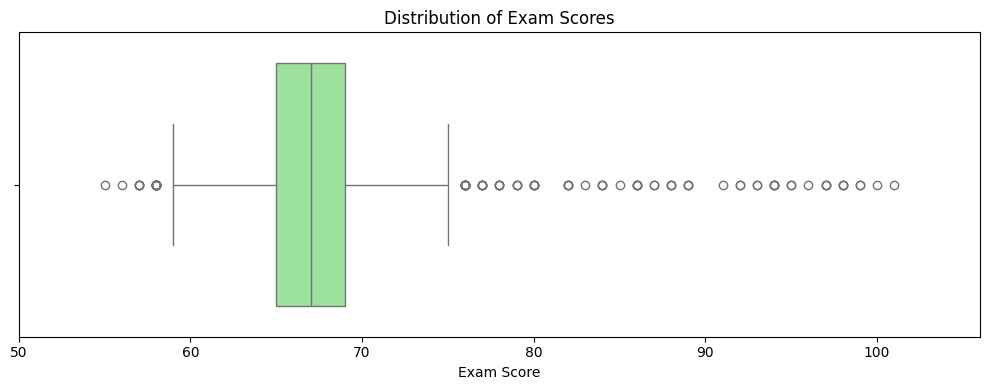

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot for the dependent variable 'Exam_Score'
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Exam_Score'], palette=['lightgreen'])
plt.xlabel('Exam Score')
plt.title('Distribution of Exam Scores')

# Adjusting the x-axis limits (if needed)
plt.xlim(df['Exam_Score'].min() - 5, df['Exam_Score'].max() + 5)

plt.tight_layout()
plt.show()


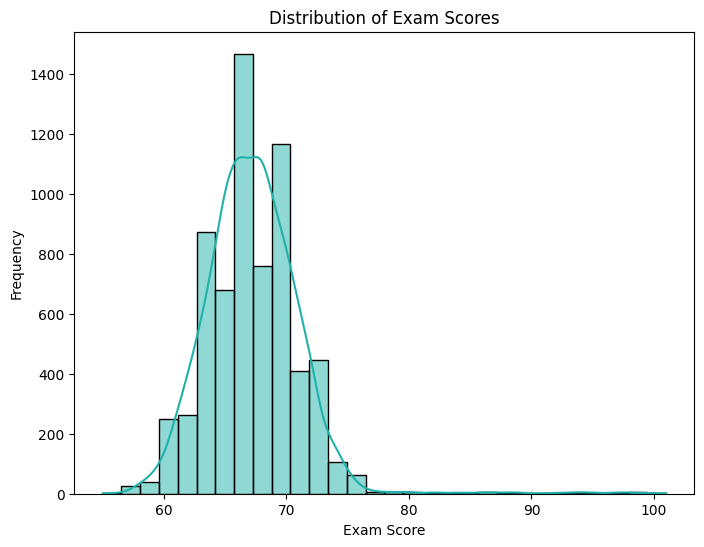

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for the dependent variable 'Exam_Score'
plt.figure(figsize=(8, 6))
sns.histplot(df['Exam_Score'], bins=30, kde=True, color='#20B2AA')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')

plt.show()


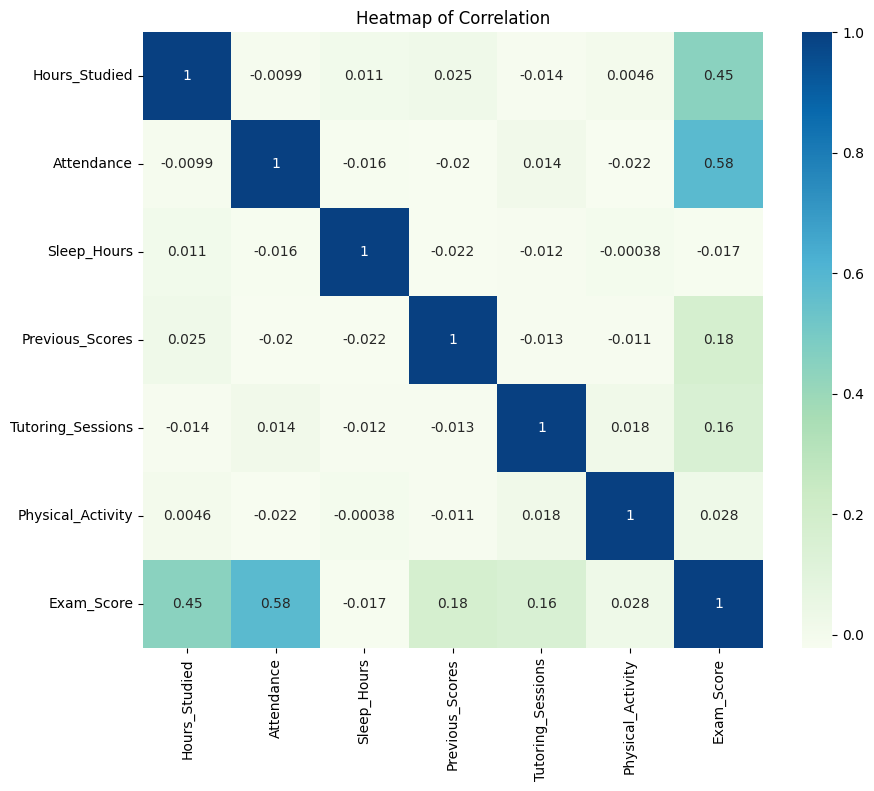

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

# Selecting only numeric columns
numeric_house_data = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation = numeric_house_data.corr()

# Heat Map
# Creating a heat map to see the correlation between all variables of the dataset
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='GnBu')
plt.title('Heatmap of Correlation')
plt.show()


In [5]:
from scipy.stats import spearmanr
import pandas as pd

# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

# Spearman correlation (for the numerical variables 'Hours_Studied' & 'Exam_Score')
r, p = spearmanr(df['Hours_Studied'], df['Exam_Score'])

# Display the results
print('Spearman Correlation: r = %.3f, p = %.3f' % (r, p))

# Interpreting results
if p > 0.05:
    print('Independent categories (fail to reject H0)')
else:
    print('Dependent categories (reject H0)')


Spearman Correlation: r = 0.481, p = 0.000
Dependent categories (reject H0)


In [6]:
from scipy.stats import pearsonr
import pandas as pd

# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

# Pearson correlation (for the numerical variables 'Hours_Studied' & 'Exam_Score')
r, p = pearsonr(df['Hours_Studied'], df['Exam_Score'])

# Display the results
print('Pearson Correlation: r = %.3f, p = %.3f' % (r, p))

# Interpreting results
if p > 0.05:
    print('Independent categories (fail to reject H0)')
else:
    print('Dependent categories (reject H0)')


Pearson Correlation: r = 0.445, p = 0.000
Dependent categories (reject H0)


In [7]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

# Creating bins for Exam Scores to categorize them (e.g., Low, Medium, High)
bin_edges = np.linspace(df['Exam_Score'].min(), df['Exam_Score'].max(), 5)  # 4 bins (Low, Medium, High, Very High)
labels = ['Low', 'Medium', 'High', 'Very High']  # Labels for bins

# Creating the Exam Score Category column
df['Exam Category'] = pd.cut(df['Exam_Score'], bins=bin_edges, labels=labels, include_lowest=True)

# Creating the contingency table (example: Exam Category vs Gender)
contingency_data = pd.crosstab(df['Gender'], df['Exam Category'], margins=False)
print(contingency_data.head(5))

# Performing Chi-square test
r, p, dof, expected = chi2_contingency(contingency_data)
print('\nChi-square value: %.3f, p = %.3f' % (r, p))

# Interpreting results
if p > 0.05:
    print('Independent categories (fail to reject H0)')
else:
    print('Dependent categories (reject H0)')


Exam Category   Low  Medium  High  Very High
Gender                                      
Female         1241    1528    11         13
Male           1641    2146    18          9

Chi-square value: 4.209, p = 0.240
Independent categories (fail to reject H0)


In [8]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

# Creating bins for Exam Scores to categorize them for chi-square testing
bin_edges = np.linspace(df['Exam_Score'].min(), df['Exam_Score'].max(), 31)
labels = [f'Bin {i}' for i in range(1, 31)]  # Labels for each bin

# Creating the Exam Score categorical column
df['Exam Score Category'] = pd.cut(df['Exam_Score'], bins=bin_edges, labels=labels, include_lowest=True)

# Creating the contingency table ( Exam Score Category vs Gender)
contingency_data = pd.crosstab(df['Gender'], df['Exam Score Category'], margins=False)
print(contingency_data.head(5))

# Performing Chi-square test for contingency table
r, p, dof, expected = chi2_contingency(contingency_data)
print('\nChi-square value: %.3f, p = %.3f' % (r, p))

# Interpreting results
if p > 0.05:
    print('Independent categories (fail to reject H0)')
else:
    print('Dependent categories (reject H0)')


Exam Score Category  Bin 1  Bin 2  Bin 3  Bin 4  Bin 5  Bin 6  Bin 7  Bin 8  \
Gender                                                                        
Female                   0     13     17    108    105    386    281    610   
Male                     2     13     23    140    159    486    398    858   

Exam Score Category  Bin 9  Bin 10  ...  Bin 21  Bin 22  Bin 23  Bin 24  \
Gender                              ...                                   
Female                 338     487  ...       2       0       2       0   
Male                   421     679  ...       4       3       1       1   

Exam Score Category  Bin 25  Bin 26  Bin 27  Bin 28  Bin 29  Bin 30  
Gender                                                               
Female                    2       2       3       1       3       2  
Male                      2       2       0       2       2       0  

[2 rows x 30 columns]

Chi-square value: 38.107, p = 0.120
Independent categories (fail to reject H0)